## Analyzing the Quantitative data

This notebook aims to explore how does personalization of chatbots relates to customers' trust and acceptance.

For the data preparation part of this analysis, I deleted the collumns/rows that were not relevant. I also made sure there were no missing values.

This notebook contains:
- Exploratory Data Analysis (EDA);
- Data Visualization;
- Hypothesis Testing and Interpretation.

#### 1. Research question:

**How does personalization influence customer trust in chatbots?**

#### 2. Hypothesis: 

**Customers who perceive chatbots as highly personalized will report higher levels of trust and will be more likely to continue using the chatbot for future interactions compared to those who perceive the chatbots as less personalized.**

### Importing libraries

In [37]:
#Importing the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import pearsonr

### Adding the data frame

In [38]:
# Add the file path
df = pd.read_csv(r'Quantitative data.csv')

# Display the first row
print("First row of the DataFrame:")
print(df.iloc[0])

# Display the number of rows and columns
print("\nNumber of rows and columns:")
print(df.shape)  # shape returns (number_of_rows, number_of_columns)

First row of the DataFrame:
Q1             Irrelevant information from a chatbot would re...
Q2             Incomplete information from a chatbot would re...
Q3             If the chatbot’s information is unclear or con...
Q4             How satisfied do you feel when a chatbot respo...
Q5             How satisfied do you feel when a chatbot respo...
Q6             How satisfied are you when a chatbot offers pr...
Q7             How satisfied are you when a chatbot lets you ...
Q8             How satisfied are you with the option to inter...
Q9             To what extent do you agree that a balance bet...
Q10            To what extent do you agree that the ability t...
Q11            To what extent would having support for multip...
Q12            How frequently do you encounter technical issu...
Q13            To what extent does a chatbot’s response speed...
Q14            To what extent does the ease of navigation and...
Q15            To what extent do human-like features (like a .

In [39]:
# Drop the second row (index 1) from the DataFrame because it contains the questions and if we keep it, the visualizations are wrong.
df = df.drop(index=1)

## Visualizing the data

Q31: To what extent does the chatbot utilizing data from your profile influence your trust and acceptance of the chatbot?

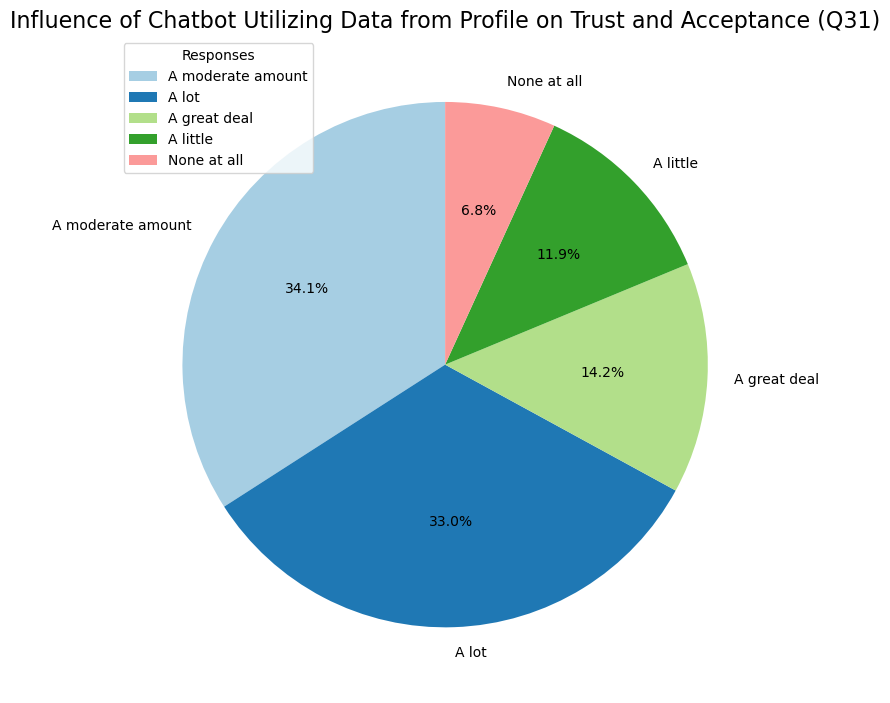

In [40]:
# Ensure 'Q31' is a categorical type with the specified order (if not done previously)
order = ["None at all", "A little", "A moderate amount", "A lot", "A great deal"]
df['Q31'] = pd.Categorical(df['Q31'], categories=order, ordered=True)

# Function to plot pie chart for Q31
def plot_pie_chart_q31():
    plt.figure(figsize=(8, 8))
    colors = plt.cm.Paired(range(len(order)))  # Use a different color for each slice
    counts = df['Q31'].value_counts()
    counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=colors)
    
    plt.title('Influence of Chatbot Utilizing Data from Profile on Trust and Acceptance (Q31)', fontsize=16)
    plt.ylabel('')  # Hides the y-label
    plt.legend(counts.index, title="Responses", loc='upper left')  # Add legend
    plt.tight_layout()
    plt.show()

# Plot pie chart for Q31
plot_pie_chart_q31()

C:\Users\40762\AppData\Local\Temp\ipykernel_32108\1426360394.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Q31', data=df, palette='viridis')


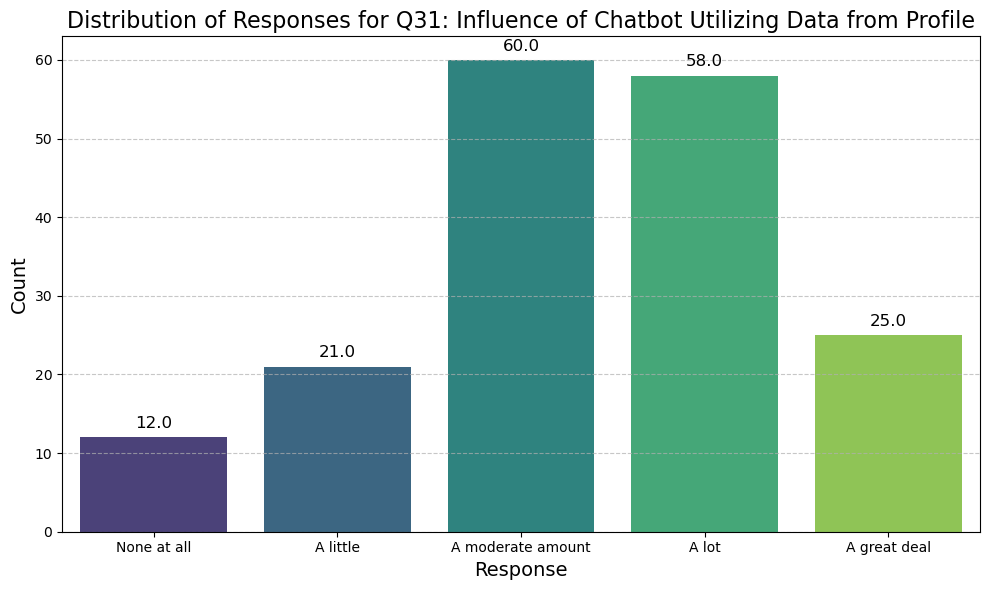

In [41]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the count plot
sns.countplot(x='Q31', data=df, palette='viridis')

# Add title and labels
plt.title("Distribution of Responses for Q31: Influence of Chatbot Utilizing Data from Profile", fontsize=16)
plt.xlabel("Response", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Annotate the bars with counts
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), 
                       textcoords='offset points')

# Show grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

Q32: To what extent do adjustments based on your input and preferences influence your trust and acceptance of the chatbot?

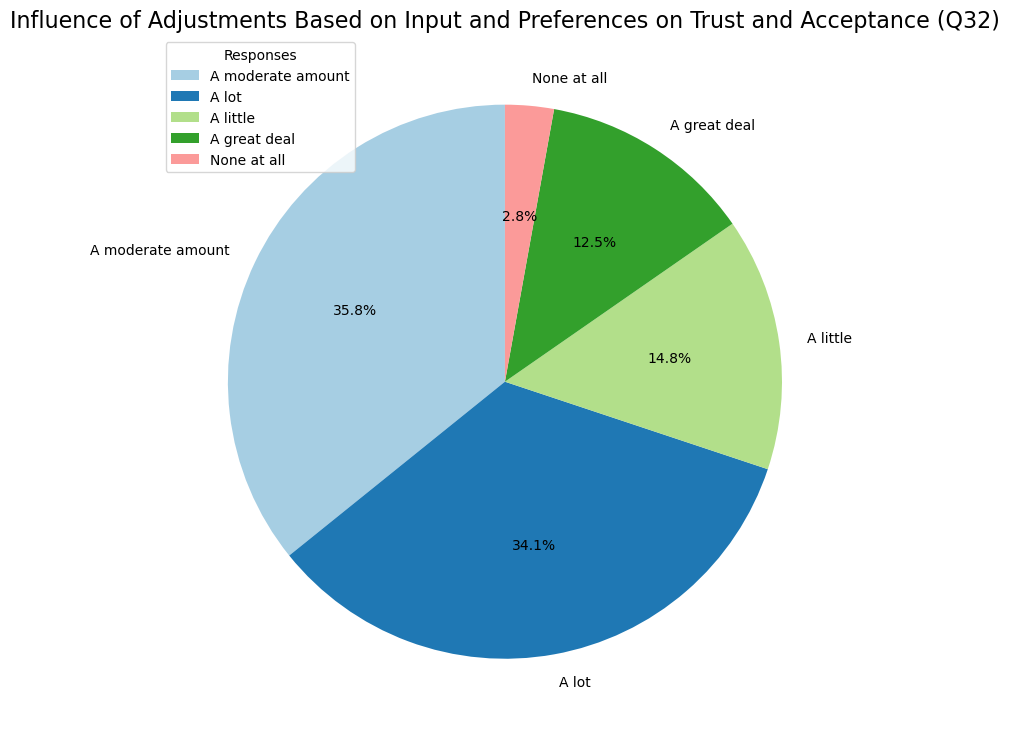

In [42]:
# Ensure 'Q32' is a categorical type with the specified order (if not done previously)
order = ["None at all", "A little", "A moderate amount", "A lot", "A great deal"]
df['Q32'] = pd.Categorical(df['Q32'], categories=order, ordered=True)

# Function to plot pie chart for Q32
def plot_pie_chart_q32():
    plt.figure(figsize=(8, 8))
    colors = plt.cm.Paired(range(len(order)))  # Use a different color for each slice
    counts = df['Q32'].value_counts()
    counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=colors)
    
    plt.title('Influence of Adjustments Based on Input and Preferences on Trust and Acceptance (Q32)', fontsize=16)
    plt.ylabel('')  # Hides the y-label
    plt.legend(counts.index, title="Responses", loc='upper left')  # Add legend
    plt.tight_layout()
    plt.show()

# Plot pie chart for Q32
plot_pie_chart_q32()

C:\Users\40762\AppData\Local\Temp\ipykernel_32108\77114911.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Q32', data=df, palette='viridis')


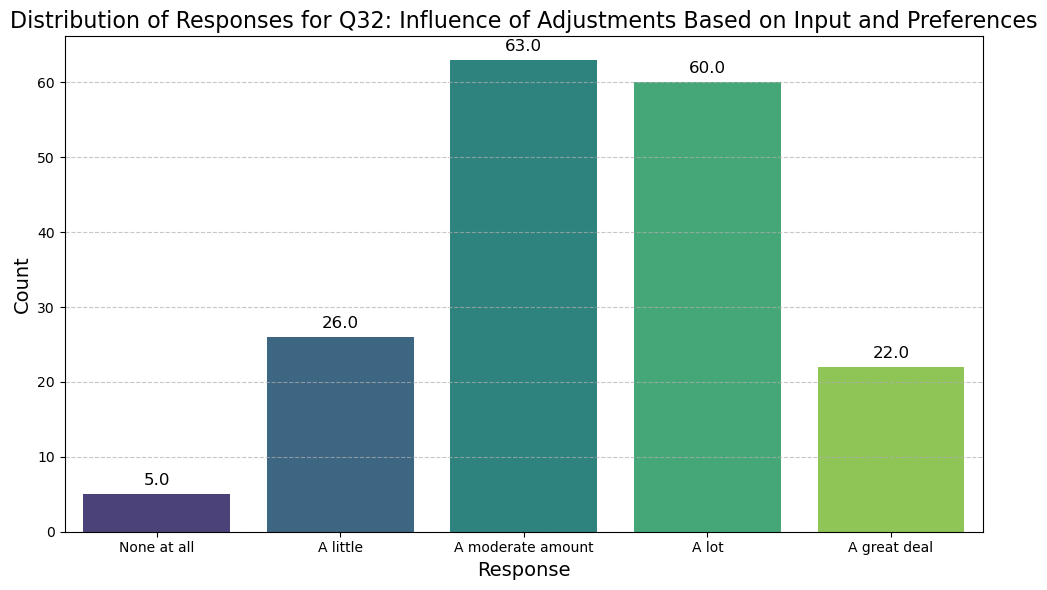

In [43]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the count plot for Q32
sns.countplot(x='Q32', data=df, palette='viridis')

# Add title and labels
plt.title("Distribution of Responses for Q32: Influence of Adjustments Based on Input and Preferences", fontsize=16)
plt.xlabel("Response", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Annotate the bars with counts
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), 
                       textcoords='offset points')

# Show grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

Q33: To what extent does the chatbot adjusting its language and tone to match your communication style influence your trust and acceptance of the chatbot?

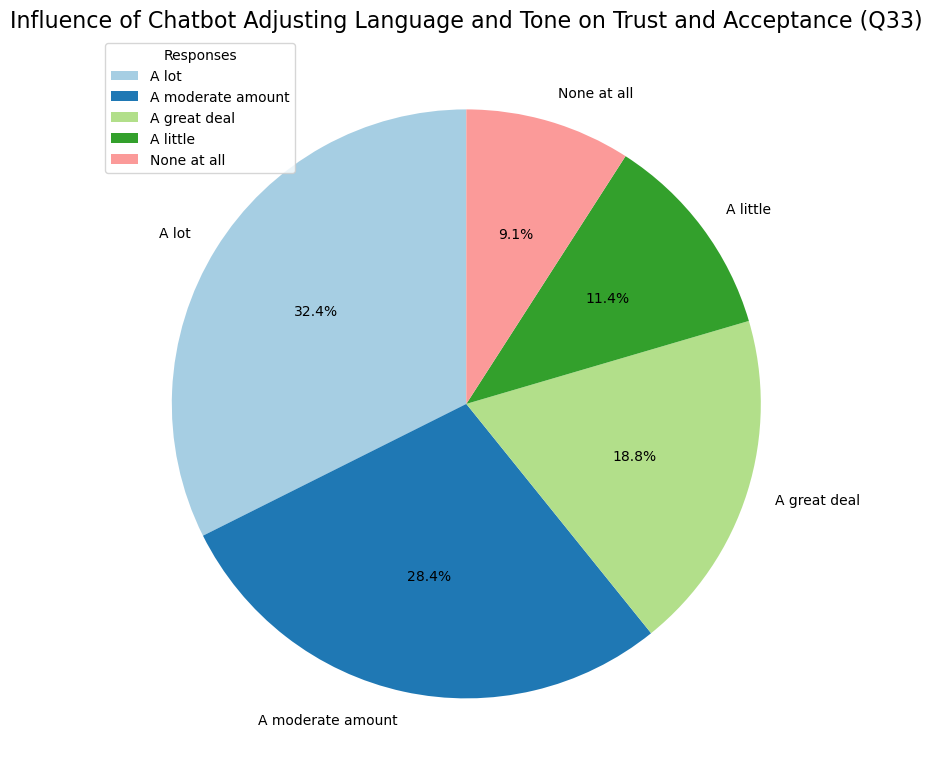

In [44]:
# Ensure 'Q33' is a categorical type with the specified order (if not done previously)
order = ["None at all", "A little", "A moderate amount", "A lot", "A great deal"]
df['Q33'] = pd.Categorical(df['Q33'], categories=order, ordered=True)

# Function to plot pie chart for Q33
def plot_pie_chart_q33():
    plt.figure(figsize=(8, 8))
    colors = plt.cm.Paired(range(len(order)))  # Use a different color for each slice
    counts = df['Q33'].value_counts()
    counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=colors)
    
    plt.title('Influence of Chatbot Adjusting Language and Tone on Trust and Acceptance (Q33)', fontsize=16)
    plt.ylabel('')  # Hides the y-label
    plt.legend(counts.index, title="Responses", loc='upper left')  # Add legend
    plt.tight_layout()
    plt.show()

# Plot pie chart for Q33
plot_pie_chart_q33()

C:\Users\40762\AppData\Local\Temp\ipykernel_32108\1994910415.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Q33', data=df, palette='viridis')


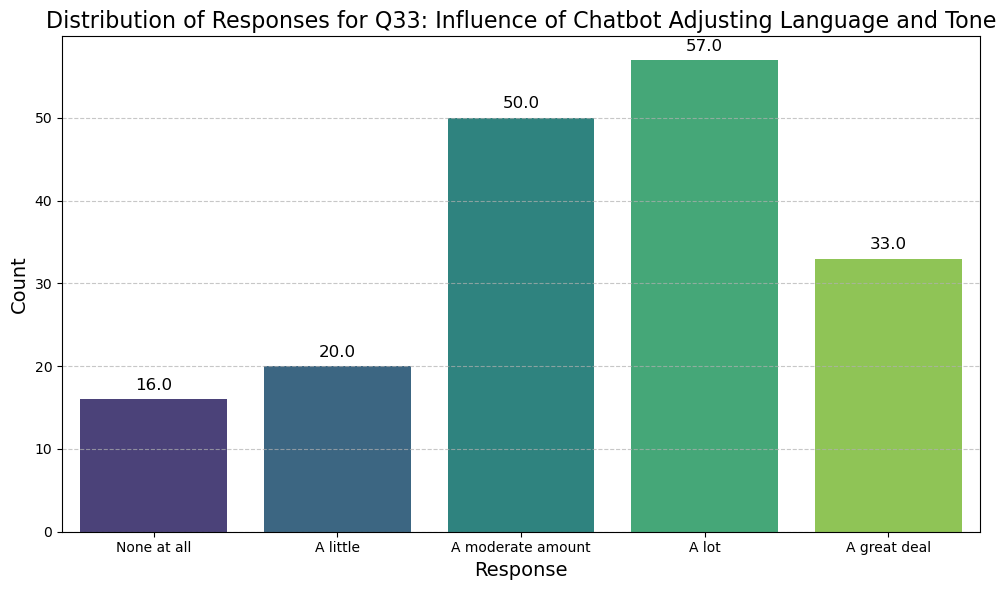

In [45]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the count plot for Q33
sns.countplot(x='Q33', data=df, palette='viridis')

# Add title and labels
plt.title("Distribution of Responses for Q33: Influence of Chatbot Adjusting Language and Tone", fontsize=16)
plt.xlabel("Response", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Annotate the bars with counts
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), 
                       textcoords='offset points')

# Show grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

Q34: To what extent does the chatbot’s ability to recall previous conversations (context awareness) influence your trust and acceptance of the chatbot?

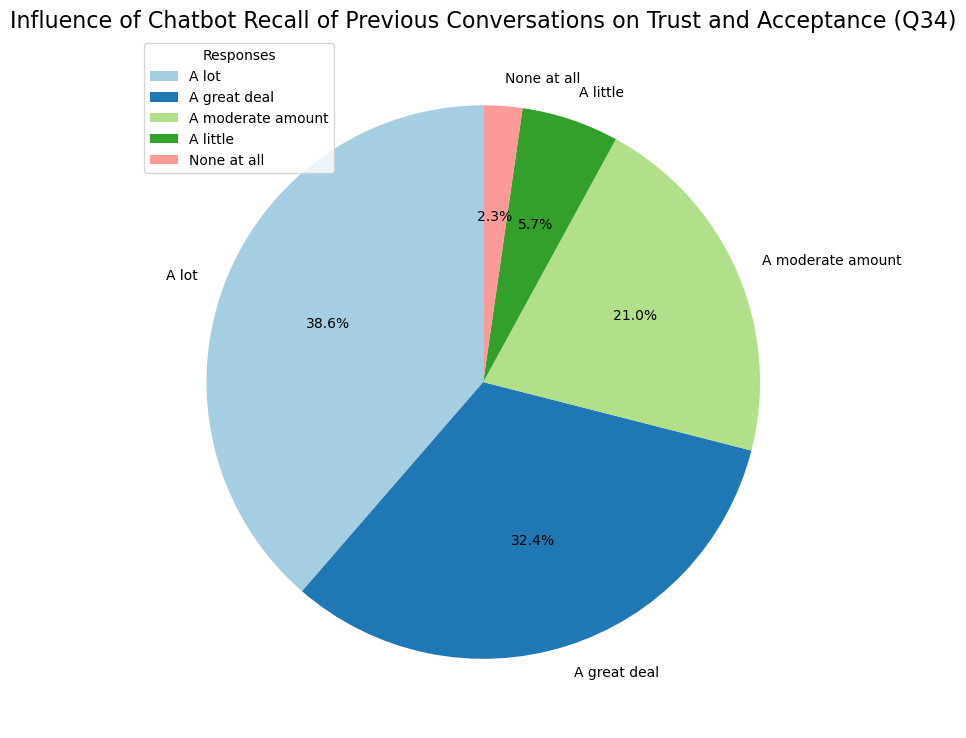

In [46]:
# Ensure 'Q34' is a categorical type with the specified order (if not done previously)
order = ["None at all", "A little", "A moderate amount", "A lot", "A great deal"]
df['Q34'] = pd.Categorical(df['Q34'], categories=order, ordered=True)

# Function to plot pie chart for Q34
def plot_pie_chart_q34():
    plt.figure(figsize=(8, 8))
    colors = plt.cm.Paired(range(len(order)))  # Use a different color for each slice
    counts = df['Q34'].value_counts()
    counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=colors)
    
    plt.title('Influence of Chatbot Recall of Previous Conversations on Trust and Acceptance (Q34)', fontsize=16)
    plt.ylabel('')  # Hides the y-label
    plt.legend(counts.index, title="Responses", loc='upper left')  # Add legend
    plt.tight_layout()
    plt.show()

# Plot pie chart for Q34
plot_pie_chart_q34()


C:\Users\40762\AppData\Local\Temp\ipykernel_32108\1357780920.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Q34', data=df, palette='viridis')


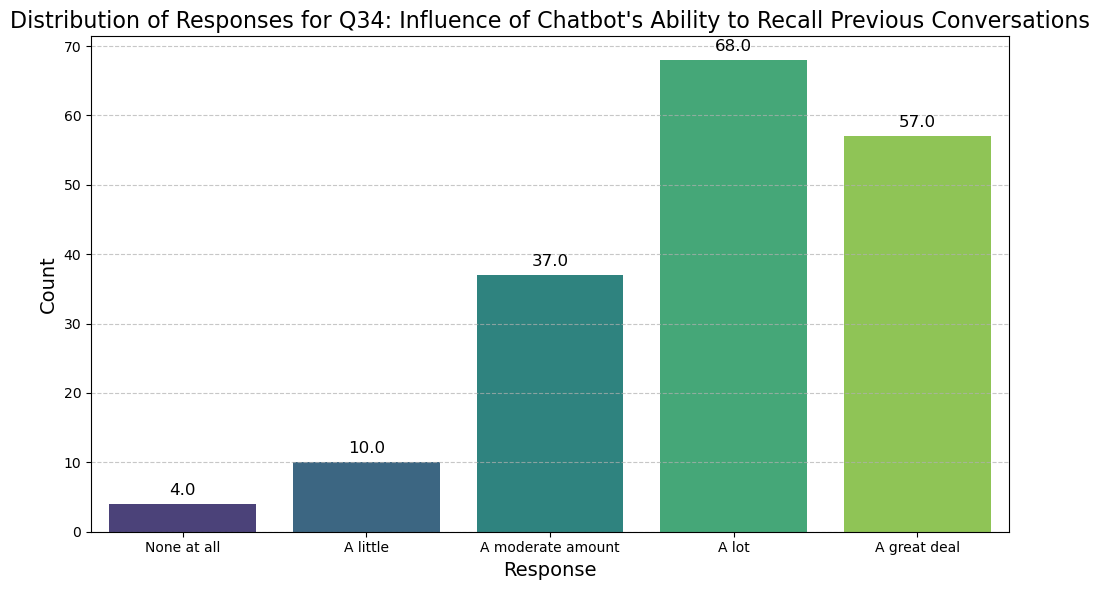

In [47]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the count plot for Q34
sns.countplot(x='Q34', data=df, palette='viridis')

# Add title and labels
plt.title("Distribution of Responses for Q34: Influence of Chatbot's Ability to Recall Previous Conversations", fontsize=16)
plt.xlabel("Response", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Annotate the bars with counts
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), 
                       textcoords='offset points')

# Show grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

Q35: To what extent do suggestions based on your interests influence your trust and acceptance of the chatbot?

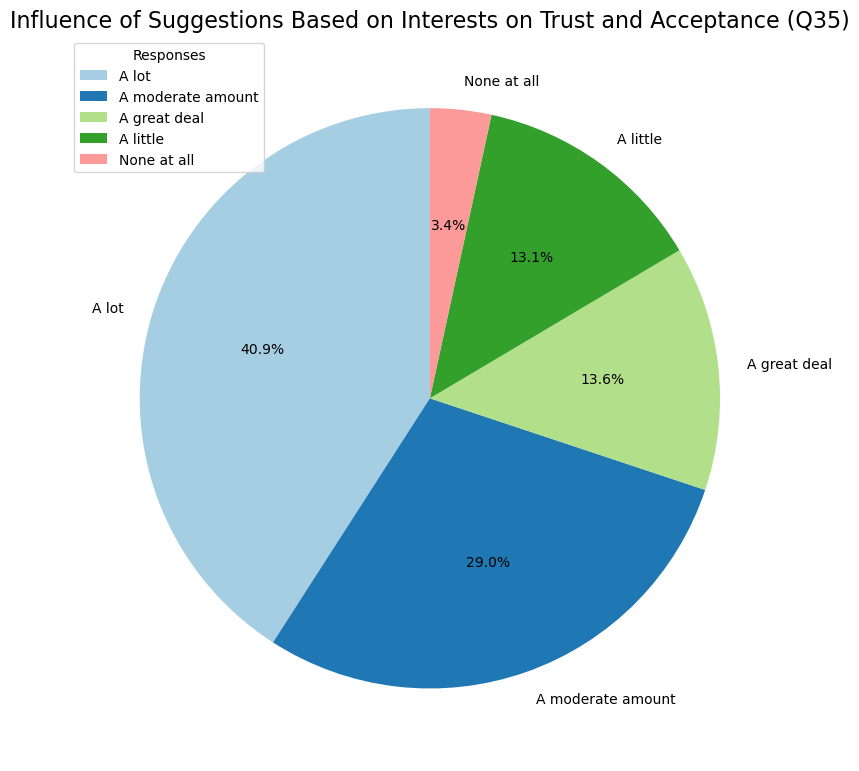

In [48]:
# Ensure 'Q35' is a categorical type with the specified order (if not done previously)
order = ["None at all", "A little", "A moderate amount", "A lot", "A great deal"]
df['Q35'] = pd.Categorical(df['Q35'], categories=order, ordered=True)

# Function to plot pie chart for Q35
def plot_pie_chart_q35():
    plt.figure(figsize=(8, 8))
    colors = plt.cm.Paired(range(len(order)))  # Use a different color for each slice
    counts = df['Q35'].value_counts()
    counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=colors)
    
    plt.title('Influence of Suggestions Based on Interests on Trust and Acceptance (Q35)', fontsize=16)
    plt.ylabel('')  # Hides the y-label
    plt.legend(counts.index, title="Responses", loc='upper left')  # Add legend
    plt.tight_layout()
    plt.show()

# Plot pie chart for Q35
plot_pie_chart_q35()

C:\Users\40762\AppData\Local\Temp\ipykernel_32108\1881925931.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Q35', data=df, palette='viridis')


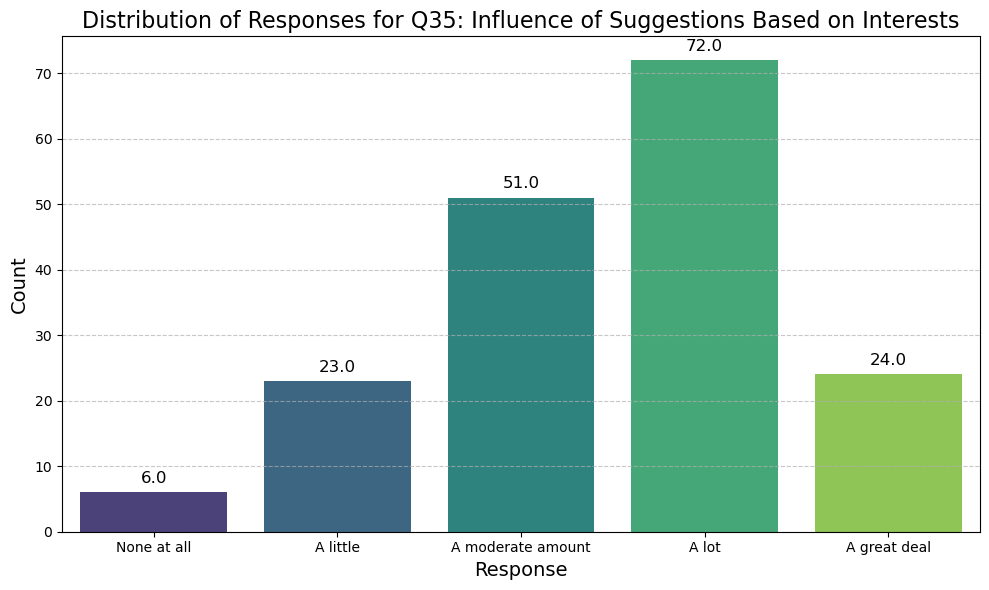

In [49]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the count plot for Q35
sns.countplot(x='Q35', data=df, palette='viridis')

# Add title and labels
plt.title("Distribution of Responses for Q35: Influence of Suggestions Based on Interests", fontsize=16)
plt.xlabel("Response", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Annotate the bars with counts
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), 
                       textcoords='offset points')

# Show grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

## Descriptive Statistics:

In [80]:
# Define the mapping of categorical values to numerical values
category_mapping = {
    "None at all": 1,
    "A little": 2,
    "A moderate amount": 3,
    "A lot": 4,
    "A great deal": 5
}

# Apply the mapping to the relevant columns (Q31 to Q35)
df[['Q31', 'Q32', 'Q33', 'Q34', 'Q35']] = df[['Q31', 'Q32', 'Q33', 'Q34', 'Q35']].replace(category_mapping)

# Generate descriptive statistics for the columns Q31 to Q35
descriptive_stats = df[['Q31', 'Q32', 'Q33', 'Q34', 'Q35']].describe()

# Display the descriptive statistics
print(descriptive_stats)

# Calculate the total score across Q31 to Q35 for each row
df['Total'] = df[['Q31', 'Q32', 'Q33', 'Q34', 'Q35']].sum(axis=1)

# Generate descriptive statistics for the new 'Total' column
total_descriptive_stats = df['Total'].describe()

# Display the descriptive statistics for the 'Total' column
print(total_descriptive_stats)


              Q31         Q32         Q33         Q34         Q35
count  176.000000  176.000000  176.000000  176.000000  176.000000
mean     3.357955    3.386364    3.403409    3.931818    3.482955
std      1.080870    0.979000    1.181665    0.983236    0.996992
min      1.000000    1.000000    1.000000    1.000000    1.000000
25%      3.000000    3.000000    3.000000    3.000000    3.000000
50%      3.000000    3.000000    4.000000    4.000000    4.000000
75%      4.000000    4.000000    4.000000    5.000000    4.000000
max      5.000000    5.000000    5.000000    5.000000    5.000000
count    176.000000
mean      17.562500
std        3.751809
min        7.000000
25%       15.000000
50%       18.000000
75%       20.000000
max       25.000000
Name: Total, dtype: float64


### Interpretation of Results for Questions 31 to 35

#### Q31: **“To what extent does the chatbot utilizing data from your profile influence your trust and acceptance of the chatbot?”**
- **Mean = 3.36, Median = 3.0, Std. Dev. = 1.08**  
  Respondents generally feel moderately positive about chatbots utilizing data from their profile to influence trust and acceptance. The mean score of 3.36 suggests a middle-ground sentiment, with the median of 3 indicating that about half of the respondents are neutral or somewhat positive. The standard deviation of 1.08 shows some variability in opinions, with a broad range of responses, reflecting differing perspectives on how much trust is influenced by the use of personal data.

#### Q32: **“To what extent do adjustments based on your input and preferences influence your trust and acceptance of the chatbot?”**
- **Mean = 3.39, Median = 3.0, Std. Dev. = 0.98**  
  A mean score of 3.39 indicates a moderate agreement that adjustments based on user input and preferences influence trust and acceptance. The median of 3 suggests that many respondents are neutral to slightly positive about this aspect. The standard deviation of 0.98 indicates slightly less variability, showing a more consistent perception among respondents regarding the value of personalized adjustments.

#### Q33: **“To what extent does the chatbot adjusting its language and tone to match your communication style influence your trust and acceptance of the chatbot?”**
- **Mean = 3.40, Median = 4.0, Std. Dev. = 1.18**  
  With a mean of 3.40 and a median of 4, respondents are generally in agreement that the chatbot's ability to adjust its language and tone based on communication style influences trust and acceptance. The higher standard deviation of 1.18, however, suggests a wider range of opinions, indicating that while many appreciate this feature, others may have more neutral or differing views on its impact.

#### Q34: **“To what extent does the chatbot's ability to recall previous conversations (context awareness) influence your trust and acceptance of the chatbot?”**
- **Mean = 3.93, Median = 4.0, Std. Dev. = 0.98**  
  The chatbot’s context awareness has a positive impact on trust and acceptance, with a mean score of 3.93 and a median of 4. This indicates that most respondents appreciate a chatbot’s ability to recall previous conversations. The standard deviation of 0.98 points to a relatively consistent sentiment, with less variation in responses, suggesting that the majority of users find this feature beneficial for enhancing trust.

#### Q35: **“To what extent do suggestions based on your interests influence your trust and acceptance of the chatbot?”**
- **Mean = 3.48, Median = 4.0, Std. Dev. = 1.00**  
  A mean of 3.48 and a median of 4 indicate that respondents generally agree that personalized suggestions based on their interests positively affect their trust and acceptance of the chatbot. The standard deviation of 1.00 reflects moderate variability, showing that while most respondents appreciate tailored suggestions, there are still some differences in opinion on how much this factor influences trust.

---

### Total Score Across Q31 to Q35
- **Mean = 17.56, Median = 18.0, Std. Dev. = 3.75**  
  The total score represents a cumulative measure of trust and acceptance across all five questions. A mean of 17.56 and a median of 18 indicate that respondents, on average, rate the influence of these personalization factors positively. The standard deviation of 3.75 suggests a reasonable spread of responses, with some variability in how strongly individuals feel that these factors contribute to trust and acceptance in chatbots.


### Demographics:

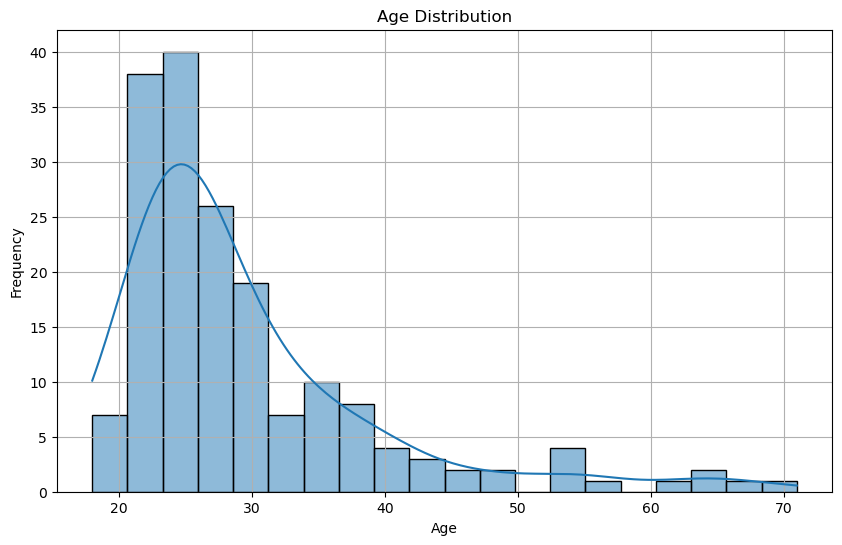

In [51]:
# Convert 'age' column to numeric, forcing non-convertible values to NaN
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# Drop rows with missing values in 'age' column
df = df.dropna(subset=['age'])

# Plot the corrected age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid()
plt.show()

#### **1. Age Distribution**
- The histogram displays the distribution of respondent ages, with the majority of the participants clustered in the younger age groups, particularly between 20 and 35 years old.

- The distribution shows a right-skewed pattern, meaning that younger respondents are more common in the dataset, while there are fewer participants as the age increases.

- There is a noticeable drop-off in frequency for respondents over the age of 40, with a few scattered individuals up to the age of 70.

- This suggests that most of the feedback comes from a younger population, which could influence trust and acceptance of chatbots, potentially differing from older individuals' perspectives.

#### **2. Nationality Distribution**
- The bar chart highlights the variety of nationalities among the respondents, with South African nationality being the most represented by a significant margin.

- A few other nationalities such as Portuguese, Polish, and American are also well-represented, though to a lesser extent compared to South Africans.

- There are multiple entries with slight variations in capitalization for the same nationality, such as "South African," "SOUTH AFRICAN," and "south african," which suggests a need for data cleaning to consolidate these into one category.

C:\Users\40762\AppData\Local\Temp\ipykernel_32108\2371786670.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=nationality_counts.index, x=nationality_counts.values, palette='viridis')
C:\Users\40762\AppData\Local\Temp\ipykernel_32108\2371786670.py:20: UserWarning: Glyph 32654 (\N{CJK UNIFIED IDEOGRAPH-7F8E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\40762\AppData\Local\Temp\ipykernel_32108\2371786670.py:20: UserWarning: Glyph 22269 (\N{CJK UNIFIED IDEOGRAPH-56FD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\40762\anaconda3\envs\BlockA_y2\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 32654 (\N{CJK UNIFIED IDEOGRAPH-7F8E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\40762\anaconda3\envs\BlockA_y2\Lib\site-packages\IPython\core\pyl

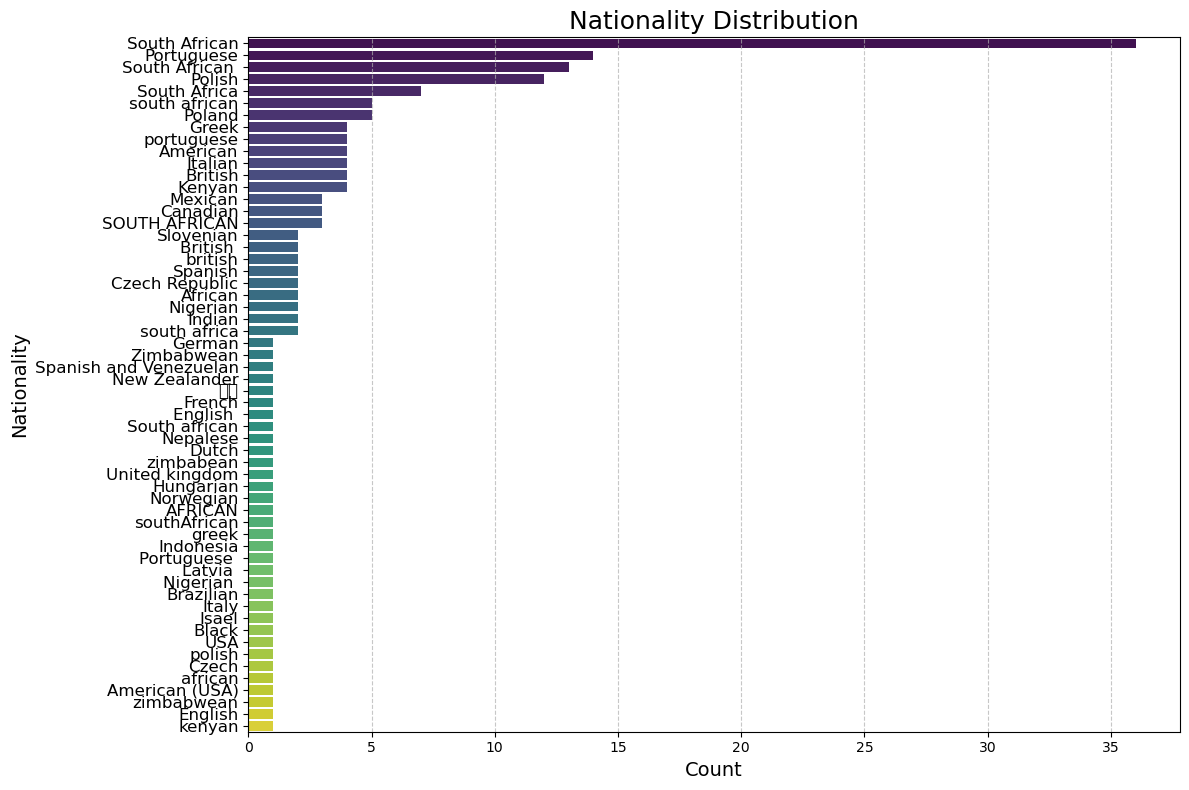

In [52]:
# Sorting nationalities by count in descending order
nationality_counts = df['nationality'].value_counts()

# Create the plot
plt.figure(figsize=(12, 8))
sns.barplot(y=nationality_counts.index, x=nationality_counts.values, palette='viridis')

# Set title and labels with enhanced formatting
plt.title('Nationality Distribution', fontsize=18)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Nationality', fontsize=14)

# Adjust y-axis label size for readability
plt.yticks(fontsize=12)

# Add gridlines to the background
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

## Hypothesis Testing and Interpretation

**1. How does personalization influence customer trust in chatbots?**

• *Dependent Variable*: Customer trust in chatbots

• *Independent Variable*: Level of personalization in chatbot interactions

• *Null Hypothesis (H0)*: There is no significant relationship between the level of personalization in chatbot interactions and customer trust in chatbots.

• *Alternative Hypothesis (H1)*: There is a significant positive relationship between the level of personalization in
chatbot interactions and customer trust in chatbots.

When I created the variables for **Personalization** and **Trust/Acceptance**, I’m aiming to simplify the analysis by capturing the key elements of each concept in a single score.

- *Personalization*: The independent variable in my hypothesis, personalization, involves several aspects (e.g., using profile data, adjusting based on preferences, recalling conversations, etc.). Instead of analyzing each aspect separately, we can average the scores from Q31-Q35 to get an overall measure of how personalized respondents perceive the chatbot to be. This creates a single, composite score representing the overall personalization level in chatbot interactions.

- *Trust/Acceptance*: Similarly, customer trust in chatbots (the dependent variable) is a multi-dimensional concept (transparency, ease of navigation, tone, and emotional recognition etc.). Instead of dealing with each question individually, this composite score lets me see the bigger picture and understand how all these factors together influence customer trust in the chatbot.

This approach allows me to conduct a more straightforward analysis and directly test the relationship between **Personalization** and **Trust/Acceptance**—the key elements of my research question.

In [53]:
# Define the mapping of categorical values to numerical values
category_mapping = {
    "None at all": 1,
    "A little": 2,
    "A moderate amount": 3,
    "A lot": 4,
    "A great deal": 5
}

# Apply the mapping to the relevant columns (Q31 to Q35)
df[['Q31', 'Q32', 'Q33', 'Q34', 'Q35']] = df[['Q31', 'Q32', 'Q33', 'Q34', 'Q35']].replace(category_mapping)

# Convert columns to numeric (float) type to allow aggregation
df[['Q31', 'Q32', 'Q33', 'Q34', 'Q35']] = df[['Q31', 'Q32', 'Q33', 'Q34', 'Q35']].astype(float)

# Create a new column 'Personalization' as the average of Q31 to Q35
df['Personalization'] = df[['Q31', 'Q32', 'Q33', 'Q34', 'Q35']].mean(axis=1)

# Display the first few rows to check the new column
df[['Q31', 'Q32', 'Q33', 'Q34', 'Q35', 'Personalization']].head()


C:\Users\40762\AppData\Local\Temp\ipykernel_32108\2062532331.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[['Q31', 'Q32', 'Q33', 'Q34', 'Q35']] = df[['Q31', 'Q32', 'Q33', 'Q34', 'Q35']].replace(category_mapping)
C:\Users\40762\AppData\Local\Temp\ipykernel_32108\2062532331.py:11: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df[['Q31', 'Q32', 'Q33', 'Q34', 'Q35']] = df[['Q31', 'Q32', 'Q33', 'Q34', 'Q35']].replace(category_mapping)
C:\Users\40762\AppData\Local\Temp\ipykernel_32108\2062532331.py:11: FutureWarning: Downcasting behavior in `r

,Q31,Q32,Q33,Q34,Q35,Personalization
2,3.0,2.0,2.0,2.0,2.0,2.2
3,2.0,2.0,2.0,3.0,2.0,2.2
4,4.0,4.0,3.0,4.0,4.0,3.8
5,5.0,4.0,4.0,5.0,2.0,4.0
6,3.0,3.0,4.0,4.0,2.0,3.2


In [54]:
#Apply the mapping to the relevant columns (Q36, Q38, Q41, Q42)
df[['Q36', 'Q38', 'Q41', 'Q42']] = df[['Q36', 'Q38', 'Q41', 'Q42']].replace(category_mapping)

# Create a new column 'Trust_Acceptance' as the average of Q31 to Q35
df['Trust_Acceptance'] = df[['Q36', 'Q38', 'Q41', 'Q42']].mean(axis=1)

# Display the first few rows to check the new column
df[['Q36', 'Q38', 'Q41', 'Q42', 'Trust_Acceptance']].head()


C:\Users\40762\AppData\Local\Temp\ipykernel_32108\3168747066.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[['Q36', 'Q38', 'Q41', 'Q42']] = df[['Q36', 'Q38', 'Q41', 'Q42']].replace(category_mapping)


,Q36,Q38,Q41,Q42,Trust_Acceptance
2,3,4,2,3,3.00
3,2,2,1,1,1.50
4,5,3,3,4,3.75
5,4,5,5,4,4.50
6,4,2,2,2,2.50


### Correlation between Age and trust

In [55]:
# Calculate correlation between Trust_Acceptance and Age 
correlation_age = df['Trust_Acceptance'].corr(df['age'])  

# Print the correlation
print(f"Correlation between Trust_Acceptance and Age: {correlation_age}")

Correlation between Trust_Acceptance and Age: -0.002899970212574715


The correlation of -0.0029 indicates that there is almost no relationship between Trust_Acceptance and Age in your data. This finding suggests that age is not a significant factor influencing how much trust users place in chatbots, prompting a consideration of other variables that might have a more substantial impact.

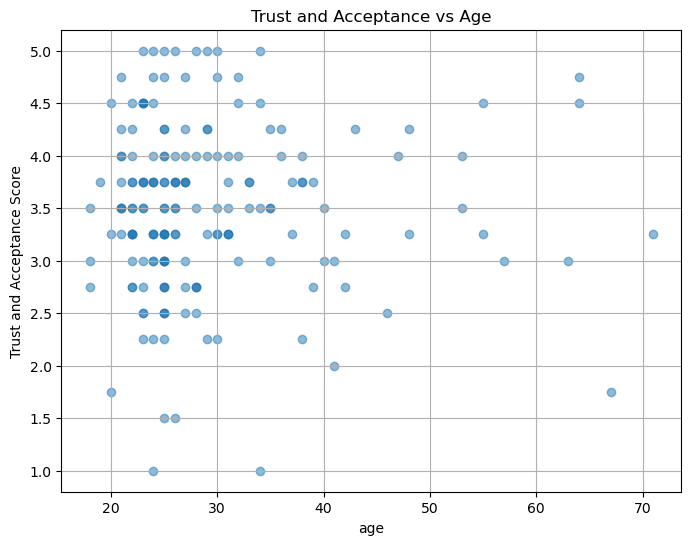

In [56]:
import matplotlib.pyplot as plt

# Scatter plot of Trust_Acceptance vs Age 
plt.figure(figsize=(8, 6))
plt.scatter(df['age'], df['Trust_Acceptance'], alpha=0.5)
plt.title("Trust and Acceptance vs Age")
plt.xlabel("age")
plt.ylabel("Trust and Acceptance Score")
plt.grid(True)
plt.show()

### Correlation between Personalization and Age

In [74]:
# Calculate correlation between Personalization and Age 
correlation_age = df['Personalization'].corr(df['age'])  

# Print the correlation
print(f"Correlation between Personalization and Age: {correlation_age}")

Correlation between Personalization and Age: -0.03631151992014383


The correlation of -0.0363 indicates a very weak negative relationship between Personalization and Age. This finding suggests that age does not play a significant role in how users perceive the level of personalization in chatbot interactions, prompting the need to consider other influencing factors. The relationship is negligible and likely not statistically significant, indicating that personalization is perceived similarly across different age demographics.

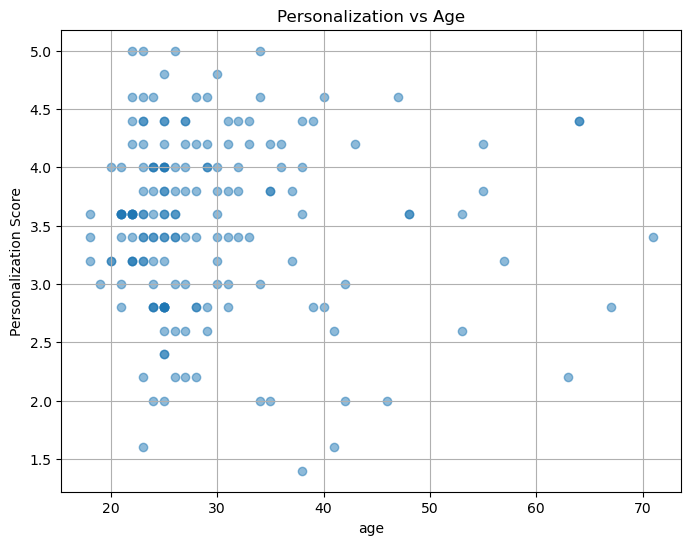

In [75]:
import matplotlib.pyplot as plt

# Scatter plot of Personalization vs Age 
plt.figure(figsize=(8, 6))
plt.scatter(df['age'], df['Personalization'], alpha=0.5)
plt.title("Personalization vs Age")
plt.xlabel("age")
plt.ylabel("Personalization Score")
plt.grid(True)
plt.show()

### Correlation between Personalization and Trust

In [76]:
# Get the numerical values for Personalization and Trust_Acceptance
personalization_values = df['Personalization']  
trust_acceptance_values = df['Trust_Acceptance']

# Calculate the Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(personalization_values, trust_acceptance_values)

# Display the results
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Correlation Coefficient: 0.6564371855586772
P-value: 4.585697224483113e-23


The correlation coefficient of **0.6564** between **Personalization** and **Trust_Acceptance** indicates a moderate to strong positive correlation, while the p-value of **4.5857e-23** suggests that this correlation is statistically significant. 

### 1. **Understanding the Correlation Coefficient**
- **Value Interpretation**:
  - **Positive Correlation**: A correlation of **0.6564** indicates a moderate to strong positive relationship between **Personalization** and **Trust_Acceptance**. This means that as the level of personalization in chatbot interactions increases, customers' trust in the chatbot also tends to increase.
  - **Strength of the Relationship**: A correlation of this magnitude suggests that personalization plays a significant role in influencing trust, implying that users who experience higher levels of personalization are more likely to feel trusting and accepting of chatbots.

### 2. **P-value**
- **Statistical Significance**:
  - **Very Low P-value**: A p-value of **4.5857e-23** (or 0.00000000000000000000045857) is extremely small and indicates a highly significant relationship between the two variables.
  - **Null Hypothesis Testing**: Typically, a p-value below **0.05** is considered significant. In this case, the p-value is much lower than that threshold, leading us to reject the null hypothesis (H0) that states there is no significant relationship between personalization and customer trust. Instead, we accept the alternative hypothesis (H1) that there is a significant positive relationship.

### 3. **Practical Implications**
- **Trust Enhancement**: The findings suggest that enhancing personalization features in chatbots (such as utilizing user data, adjusting language, or recalling past interactions) can lead to higher levels of trust among users.
- **Design and Development Focus**: For developers and businesses, this correlation implies that investing in personalization features may be a valuable strategy for improving customer trust and acceptance of chatbots, potentially leading to better user engagement and satisfaction.

### 4. **Considerations for Further Analysis**
- **Causation vs. Correlation**: While the correlation is strong, it’s important to note that correlation does not imply causation. Future research could explore whether increasing personalization directly causes an increase in trust or if other underlying factors contribute to both.
- **Explore Additional Variables**: Consider examining how other factors, such as user demographics or prior experiences with technology, interact with personalization and trust.

### Summary
In summary, the correlation coefficient of **0.6564** indicates a moderate to strong positive relationship between personalization and customer trust in chatbots, while the p-value of **4.5857e-23** demonstrates that this relationship is statistically significant. These findings suggest that increasing personalization in chatbot interactions could significantly enhance user trust, which is valuable for chatbot design and development strategies.

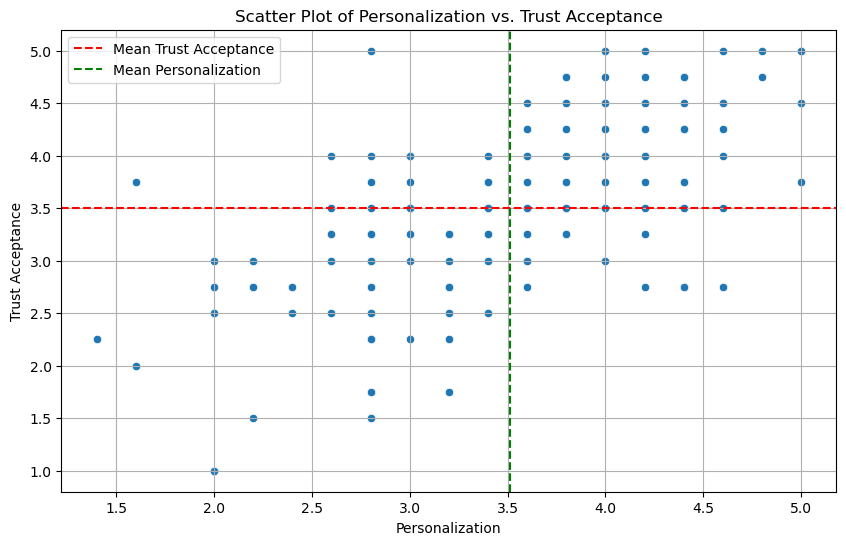

In [77]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=personalization_values, y=trust_acceptance_values)
plt.title('Scatter Plot of Personalization vs. Trust Acceptance')
plt.xlabel('Personalization')
plt.ylabel('Trust Acceptance')
plt.axhline(y=trust_acceptance_values.mean(), color='r', linestyle='--', label='Mean Trust Acceptance')
plt.axvline(x=personalization_values.mean(), color='g', linestyle='--', label='Mean Personalization')
plt.legend()
plt.grid()
plt.show()

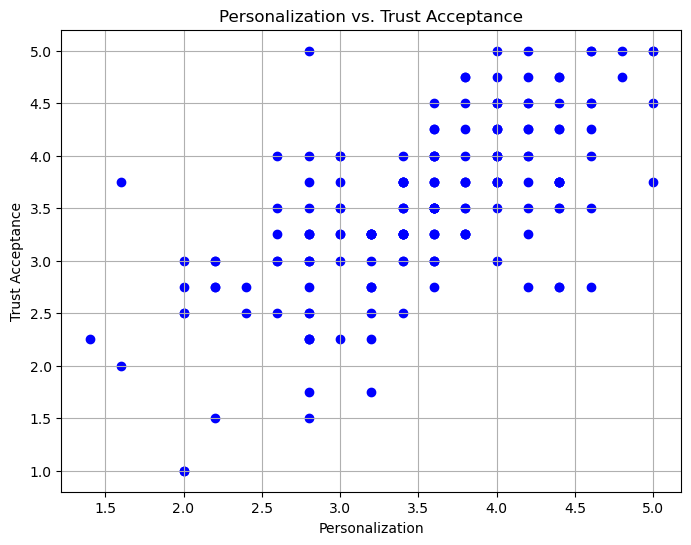

In [78]:
# Create a basic scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(personalization_values, trust_acceptance_values, color='blue')
plt.title('Personalization vs. Trust Acceptance')
plt.xlabel('Personalization')
plt.ylabel('Trust Acceptance')
plt.grid(True)
plt.show()